In [1]:
streamflow_model = "/media/windows/projects/hydro_forecasting/machine_learning/output/operative/B003/SB001/R003/superens_forecast.csv"
streamflow_metered = "/media/lacie2022/data/meteo/eu/it/taa/aa/online/streamflow/15570PG.csv"
prec_model = "/media/windows/projects/hydro_forecasting/machine_learning/input/operative/B003/SB001/R003/precipitation/ensemble/20230605.csv"
prec_metered = "/media/lacie2022/data/meteo/eu/it/taa/aa/online/precipitation/15800MS.csv"
temp_model = "/media/windows/projects/hydro_forecasting/machine_learning/input/operative/B003/SB001/R003/temperature/ensemble/20230605.csv"
temp_metered = "/media/lacie2022/data/meteo/eu/it/taa/aa/online/temperature/15800MS.csv"
c_rel_output_path = "/media/windows/projects/hydro_forecasting/machine_learning/output/operative/B003/SB001/R003/"

In [2]:
from sys import path as syspath

from numpy import arange
from random import choices

import matplotlib.pyplot as plt

lib_dir = "/home/daniele/documents/github/ftt01/phd/share/lib/"
syspath.insert( 0, lib_dir )

from lib import instantiatePlot, pd, dt

In [3]:
df = pd.read_csv(streamflow_model, index_col=0)
df_real = pd.read_csv(streamflow_metered, index_col=0)

In [4]:
df.index = pd.to_datetime(df.index)
df.index = [ d + dt.timedelta(hours=1) for d in df.index ]
df.index.name = 'datetime'

df_real.index = pd.to_datetime(df_real.index)

start_date = df.index[0]
end_date = df.index[-1]

df_real = df_real.resample("H").mean()

df_real = df_real[start_date:end_date]
df_real = pd.DataFrame([i[0] for i in df_real.values], columns=['values'], index=df.index)
df.index.name = "datetime"

/tmp/ipykernel_3912061/1614472968.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  df_real = df_real[start_date:end_date]


In [5]:
def generate_colors(N):
    colors = {}
    for i in range(1, N+1):
        color = '#' + ''.join(choices('0123456789ABCDEF', k=6))
        colors[f"M{i}"] = color
    return colors

In [11]:
def plot_super_ens(df, patterns=[
    'M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12','M13','M14','M15','M16','M17','M18','M19','M20'],
    output_path="./", percs=False, df_real=None):

    colors = generate_colors(len(patterns))

    fig, axs = instantiatePlot("Time $[days]$", "Q $[m^3/s]$", output_format='tiff', width=300, height=200, my_dpi=100)

    for p in patterns:
        sel_cols = df.filter(regex=p+'_')
        median = sel_cols.median(axis=1)
        percentiles = sel_cols.quantile([0.25, 0.75],axis=1).T

        axs.plot(median, label=p, linestyle="solid", color=colors[p])
        if percs == True:
            axs.plot(percentiles, linestyle="--", color=colors[p])
    
    try:
        axs.plot(df_real, label='measured', linestyle="solid", color='black', linewidth=2)
    except:
        print("No metered data")

    axs.legend(ncol=5)
    axs.xaxis.set_tick_params(labelrotation=90)
    
    # output_file = output_path + "superens_forecast.tiff"  
    # fig.savefig( output_file, format='tiff', bbox_inches='tight', facecolor='w', dpi=150 )

In [12]:
def plot_prec_ens(df, output_path="./", percs=False, df_real=None):

    color = '#' + ''.join(choices('0123456789ABCDEF', k=6))

    fig, axs = instantiatePlot("Time $[days]$", "Precipitation $[mm]$", output_format='tiff', width=300, height=200, my_dpi=100)

    median = df.median(axis=1)
    percentiles = df.quantile([0.25, 0.75],axis=1).T

    axs.plot(median, label='median', linestyle="solid", color=color)
    if percs == True:
        axs.plot(percentiles, linestyle="--", color=color)
    
    try:
        axs.plot(df_real, label='measured', linestyle="solid", color='black', linewidth=2)
    except:
        print("No metered data")

    axs.legend()
    axs.xaxis.set_tick_params(labelrotation=90)
    

    # output_file = output_path + "superens_forecast.tiff"  
    # fig.savefig( output_file, format='tiff', bbox_inches='tight', facecolor='w', dpi=150 )

In [13]:
def createBoxPlot(df, x_label, y_label, output_file, label=None,
                  x_major_locator=None, x_major_formatter=None,
                  output_format="png", xscale="linear", yscale="linear",
                  width=190, height=90, scale_factor=1,
                  tick_size=10, label_size=10, legend_fontsize=8,
                  ratio_width=190, ratio=3740/500, my_dpi=300):
    
    # if period == "MS":
    #     import matplotlib.ticker as ticker
    #     x_major_locator = ticker.MultipleLocator(1)
    #     x_labels = range(1, 12+1)
    #     x_major_formatter = ticker.FuncFormatter(lambda x, _: dict(
    #         zip(range(len(x_labels)), x_labels)).get(x, ""))
    # elif period == "H":
    #     import matplotlib.ticker as ticker
    #     x_major_locator = ticker.MultipleLocator(2)
    #     x_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
    #                 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    #     x_major_formatter = ticker.FuncFormatter(lambda x, _: dict(
    #         zip(range(len(x_labels)), x_labels)).get(x, ""))

    # new_column_names = {col: i for i, col in enumerate(df.columns)}
    # df_renamed = df.rename(columns=new_column_names)

    # df_renamed.index = pd.to_datetime(df_renamed.index)
    # # df = df_renamed.resample("3H").mean()
    df_reset = df.reset_index()
    df_reset.drop(columns=['datetime'], inplace=True)
    # # Create a boxplot using Seaborn with the index as x-axis
    # # df_long=df_reset.melt(var_name='Column', value_name='Value')

    plot_x_inches = ratio / ratio_width * width
    plot_y_inches = ratio / ratio_width * height

    fig, axs = plt.subplots(1,
                            figsize=[plot_x_inches, plot_y_inches],
                            tight_layout={'pad': 0},
                            dpi=my_dpi
                            )

    # add data and data_label to legend
    import seaborn as sns
    PROPS = {
        'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': '1'},
        'medianprops': {'color': 'black', 'linewidth': '1.5'},
        'whiskerprops': {'color': 'black', 'linewidth': '0.75'},
        'capprops': {'color': 'black', 'linewidth': '0.75'}
    }
    
    sns.boxplot(data=df_reset.T, ax=axs, dodge=False, **PROPS)

    axs.tick_params(labelsize=tick_size/scale_factor)

    axs.set_xscale(xscale)
    axs.set_yscale(yscale)

    axs.set_ylabel(y_label, fontsize=label_size/scale_factor)
    axs.set_xlabel(x_label, fontsize=label_size/scale_factor)

    axs.set_xticklabels(df.index)
    axs.xaxis.set_tick_params(labelrotation=90)

    axs.set(ylim=(df.min().min() - 0.1, df.max().max() + 0.1))
    axs.set_xticks(range(len(df.index)), labels=df.index)

    if label != None:
        axs.text(0, 0, label, transform=fig.dpi_scale_trans,
                 fontsize=label_size/scale_factor, va='bottom', ha='left')

    if x_major_locator != None:
        axs.xaxis.set_major_locator(x_major_locator)

    if x_major_formatter != None:
        axs.xaxis.set_major_formatter(x_major_formatter)

    axs.axhline(linewidth=0.5, linestyle="--", color="k")

    # mkNestedDir(getPathFromFilepath(output_file))
    # fig.savefig(output_file, format=output_format,
    #             bbox_inches='tight', facecolor='w', dpi=my_dpi)

    plt.show()
    plt.close(fig=fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No metered data


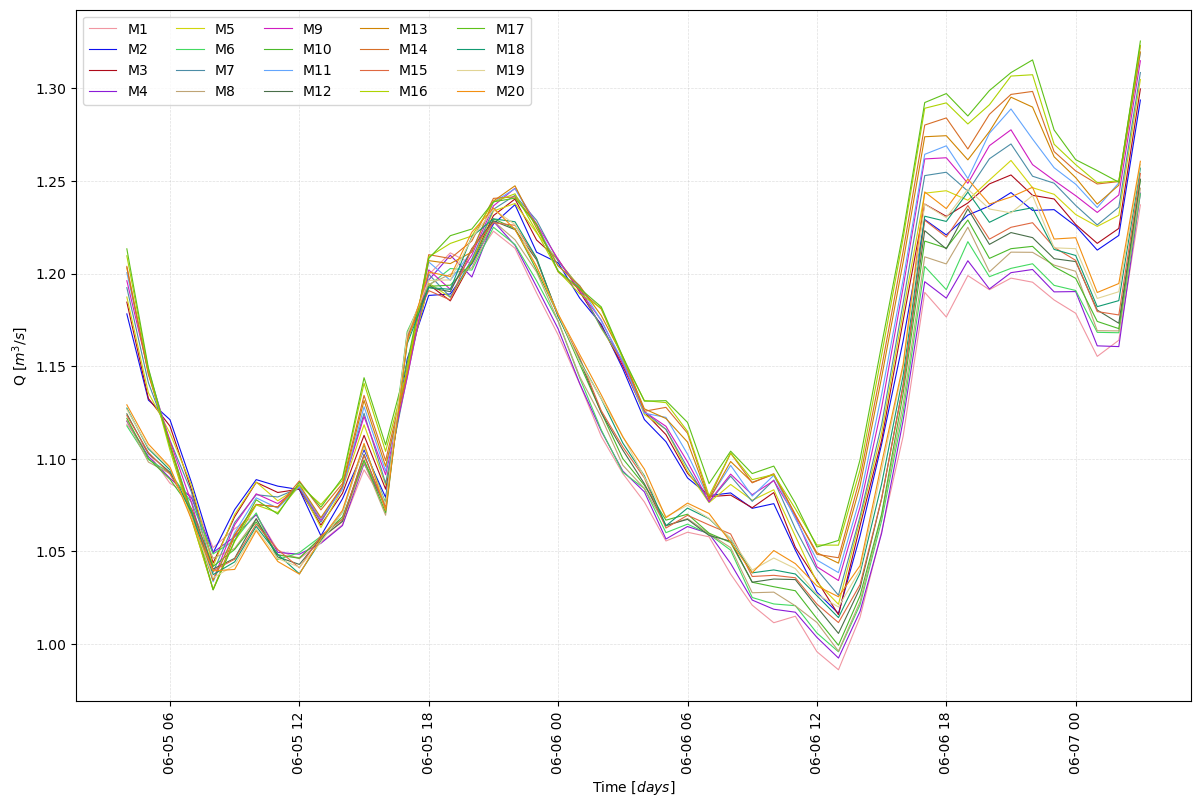

In [14]:
# plot_super_ens(df,output_path=c_rel_output_path, df_real=df_real)
plot_super_ens(df,output_path=c_rel_output_path, df_real=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No metered data


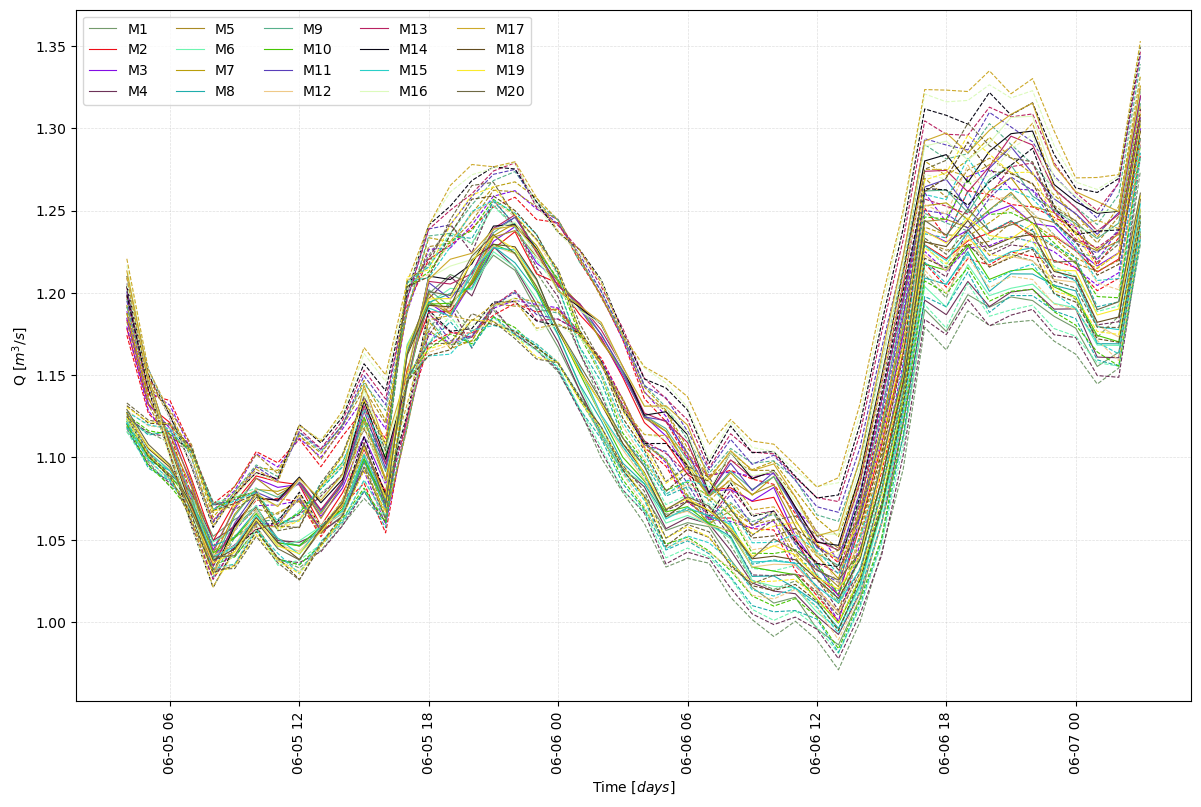

In [15]:
plot_super_ens(df,output_path=c_rel_output_path, percs=True)

/tmp/ipykernel_3912061/3147969302.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(df.index)


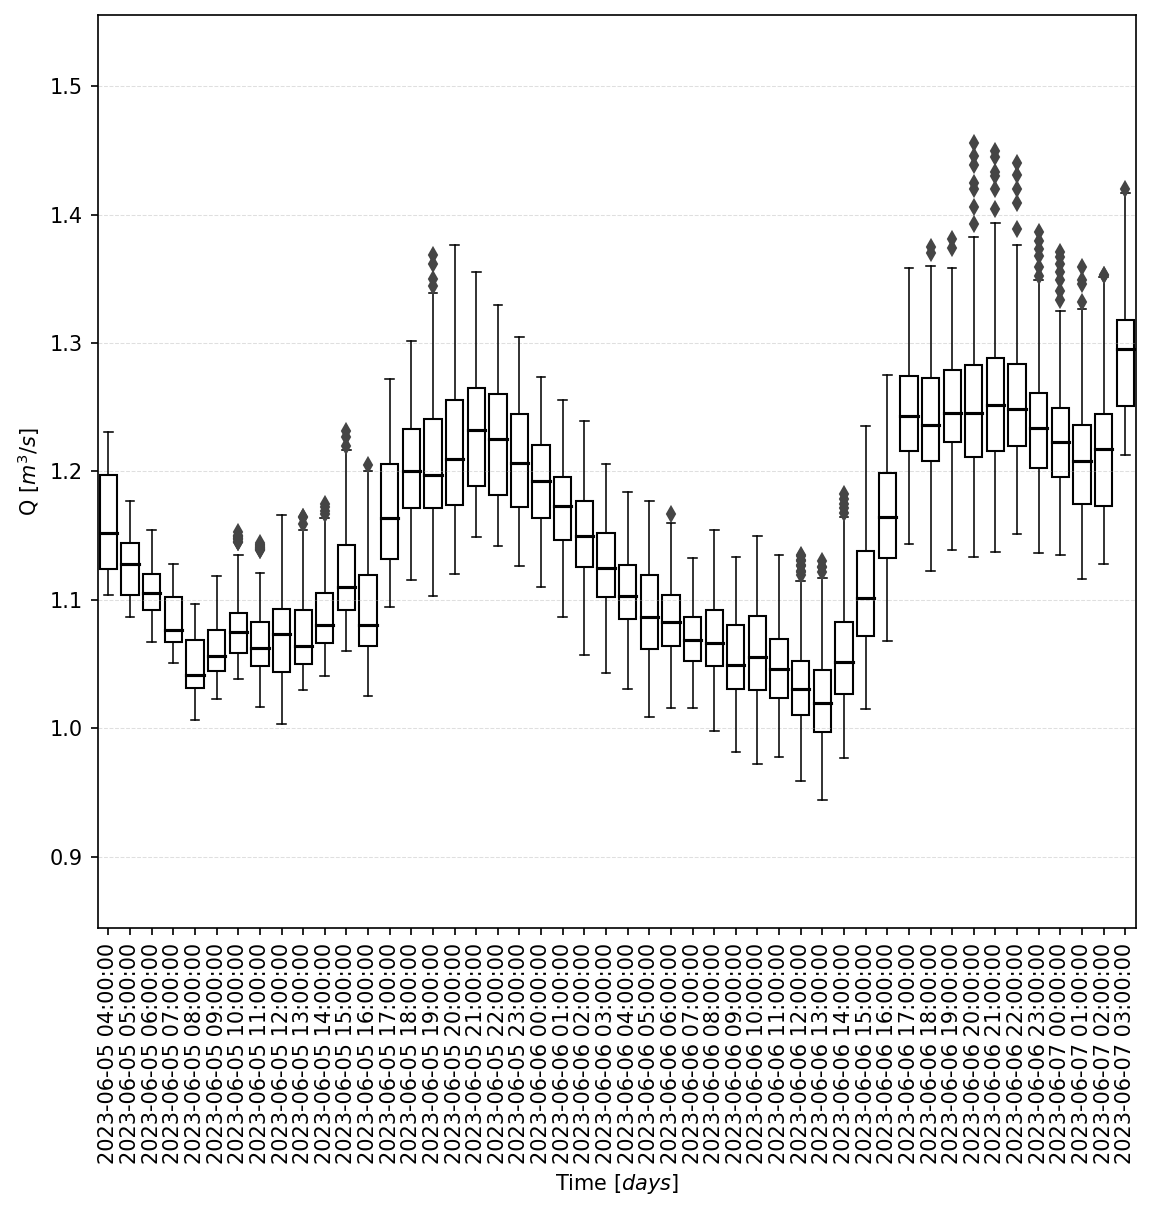

In [16]:
createBoxPlot(df,"Time $[days]$", "Q $[m^3/s]$", c_rel_output_path + "superens_forecast_boxplot.tiff", height=200, my_dpi=150)

In [ ]:
df = pd.read_csv(prec_model, index_col=0)[-48:]
df_real = pd.read_csv(prec_metered, index_col=0)

In [ ]:
df.index = pd.to_datetime(df.index)
df.index = [ d + dt.timedelta(hours=1) for d in df.index ]
df.index.name = 'datetime'

df_real.index = pd.to_datetime(df_real.index)

start_date = df.index[0]
end_date = df.index[-1]

df_real = df_real.resample("H").mean()

df_real = df_real[start_date:end_date]
df_real = pd.DataFrame([i[0] for i in df_real.values], columns=['values'], index=df.index)
df.index.name = "datetime"

In [ ]:
plot_prec_ens(df,df_real=df_real)